In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import  stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Import the necessary libraries needed

In [2]:
data = pd.read_excel(r"D:\DS\Internship\Ratings Prediction\reviews_ratings.xlsx")
data.head()

,Product,Ratings,Reviews
0,Mobiles,5,Very pleased
1,Mobiles,4,It works good but it goes slow sometimes but i...
2,Mobiles,4,Great phone to replace my lost phone. The only...
3,Mobiles,1,I already had a phone with problems... I know ...
4,Mobiles,2,The charging port was loose. I got that solder...


Import and Visualise the data

In [3]:
data.nunique().sort_values()

Ratings        5
Product       10
Reviews    11331
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20117 entries, 0 to 20116
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  20117 non-null  object
 1   Ratings  20117 non-null  int64 
 2   Reviews  20114 non-null  object
dtypes: int64(1), object(2)
memory usage: 471.6+ KB


- All the data are in object or integer type.
- There is null value in reviews. Recheck using .isnull

In [5]:
data.shape

(20117, 3)

20117 rows and 3 columns are present

## EDA and Preprocessing

In [6]:
data.isnull().sum()

Product    0
Ratings    0
Reviews    3
dtype: int64

There is null values present in reviews column

In [7]:
data = data.dropna()

Drop Null values

In [8]:
data['Reviews'] = data['Reviews'].astype(str)
data['Product'] = data['Product'].astype(str)

Convert the object data type to string

In [9]:
data.describe()

,Ratings
count,20114.000000
mean,3.477926
std,1.629733
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
data.columns

Index(['Product', 'Ratings', 'Reviews'], dtype='object')

In [11]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')

Number of duplicates dropped 8505


In [12]:
data.skew()

Ratings   -0.472293
dtype: float64

Product             
Blutooth Headset        7174
Professional Cameras    1567
Mobiles                  998
Laptops                  763
Printers                 350
Monitors                 275
Head Phones              239
Phones                   171
Smart Watches             60
Home Theaters             12
dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


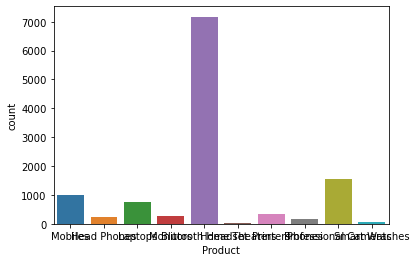

In [13]:
col=['Product']
print(data[col].value_counts())
sns.countplot(data['Product'])
plt.show()

Data is imbalanced

In [14]:
data['Ratings'].value_counts()

5    4852
1    2776
4    1849
3    1181
2     951
Name: Ratings, dtype: int64

Data is imbalanced

In [15]:
data['length'] = data['Reviews'].str.len()
data.head(2)

,Product,Ratings,Reviews,length
0,Mobiles,5,Very pleased,12
1,Mobiles,4,It works good but it goes slow sometimes but i...,76


Length of the characters

In [16]:
data['Reviews'] = data['Reviews'].str.lower()

data['Reviews'] = data['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
data['Reviews'] = data['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
data['Reviews'] = data['Reviews'].str.replace(r'£|\$', 'dollers')
    
data['Reviews'] = data['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
data['Reviews'] = data['Reviews'].str.replace(r'\d+(\.\d+)?', 'numbr')

<ipython-input-16-874cfe415a32>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
<ipython-input-16-874cfe415a32>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
<ipython-input-16-874cfe415a32>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace(r'£|\$', 'dollers')
<ipython-input-16-874cfe415a32>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
<ipython-input-16-874cfe415a32>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews

- Conerting to lower case
- Converting the email addresses
- Replace URLs with webaddress
- Replace symbols with dollars
- Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) 
- Replace the numbers

In [17]:
print(string.punctuation)
def rem_punct(txt):
    txt_nopunct = ''.join ([c for c in txt if c not in string.punctuation])
    return txt_nopunct

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
data['Reviews'] = data['Reviews'].apply(lambda x: rem_punct(x))
data.head()

,Product,Ratings,Reviews,length
0,Mobiles,5,very pleased,12
1,Mobiles,4,it works good but it goes slow sometimes but i...,76
2,Mobiles,4,great phone to replace my lost phone the only ...,223
3,Mobiles,1,i already had a phone with problems i know it ...,415
4,Mobiles,2,the charging port was loose i got that soldere...,214


Removing punctuations

In [19]:
data['Tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1)
data.head()

,Product,Ratings,Reviews,length,Tokenized
0,Mobiles,5,very pleased,12,"[very, pleased]"
1,Mobiles,4,it works good but it goes slow sometimes but i...,76,"[it, works, good, but, it, goes, slow, sometim..."
2,Mobiles,4,great phone to replace my lost phone the only ...,223,"[great, phone, to, replace, my, lost, phone, t..."
3,Mobiles,1,i already had a phone with problems i know it ...,415,"[i, already, had, a, phone, with, problems, i,..."
4,Mobiles,2,the charging port was loose i got that soldere...,214,"[the, charging, port, was, loose, i, got, that..."


Sentences are tokenized

In [20]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
data.head()

,Product,Ratings,Reviews,length,Tokenized
0,Mobiles,5,pleased,12,"[very, pleased]"
1,Mobiles,4,works good goes slow sometimes good phone love,76,"[it, works, good, but, it, goes, slow, sometim..."
2,Mobiles,4,great phone replace lost phone thing volume bu...,223,"[great, phone, to, replace, my, lost, phone, t..."
3,Mobiles,1,already phone problems know stated used dang s...,415,"[i, already, had, a, phone, with, problems, i,..."
4,Mobiles,2,charging port loose got soldered needed new ba...,214,"[the, charging, port, was, loose, i, got, that..."


Stopwords are removed

In [21]:
lem = WordNetLemmatizer()
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))
data.head()

,Product,Ratings,Reviews,length,Tokenized
0,Mobiles,5,pleased,12,"[very, pleased]"
1,Mobiles,4,work good go slow sometimes good phone love,76,"[it, works, good, but, it, goes, slow, sometim..."
2,Mobiles,4,great phone replace lost phone thing volume bu...,223,"[great, phone, to, replace, my, lost, phone, t..."
3,Mobiles,1,already phone problem know stated used dang st...,415,"[i, already, had, a, phone, with, problems, i,..."
4,Mobiles,2,charging port loose got soldered needed new ba...,214,"[the, charging, port, was, loose, i, got, that..."


Lemmatization is done

In [22]:
data['clean_length'] = data.Reviews.str.len()
data.head()

,Product,Ratings,Reviews,length,Tokenized,clean_length
0,Mobiles,5,pleased,12,"[very, pleased]",7
1,Mobiles,4,work good go slow sometimes good phone love,76,"[it, works, good, but, it, goes, slow, sometim...",43
2,Mobiles,4,great phone replace lost phone thing volume bu...,223,"[great, phone, to, replace, my, lost, phone, t...",119
3,Mobiles,1,already phone problem know stated used dang st...,415,"[i, already, had, a, phone, with, problems, i,...",218
4,Mobiles,2,charging port loose got soldered needed new ba...,214,"[the, charging, port, was, loose, i, got, that...",129


The difference between the length of characters befor pre-processing and after pre-processing is visualised

In [23]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
x_t = tf_vec.fit_transform(data['Reviews'])
x = x_t
y = data['Ratings']

Vectorize the text

## Model building

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=.30)

### Linear Regression

In [25]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred_lr = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_lr)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_lr)
print('Mean Squared Error:',mse)

Regression Score: -1.6388157276335282
Mean Absolute Error: 1.7931626273681496
Mean Squared Error: 6.960699857469108


### Decision Tree

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred_dt = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_dt)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_dt)
print('Mean Squared Error:',mse)

Regression Score: 0.10392530746216544
Mean Absolute Error: 0.9768409527264388
Mean Squared Error: 2.36367659905656


### Random Forest Regressor

In [27]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred_rfr = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_rfr)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_rfr)
print('Mean Squared Error:',mse)

Regression Score: 0.4833071854571096
Mean Absolute Error: 0.8496583894237993
Mean Squared Error: 1.3629385193066759


### SVR

In [28]:
sv = SVR()
sv.fit(x_train,y_train)
sv_ = sv.score(x_test,y_test)
print('Regression Score:',sv_)

y_pred_sv = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_sv)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_sv)
print('Mean Squared Error:',mse)
SVR

Regression Score: 0.5775630485704679
Mean Absolute Error: 0.8496583894237993
Mean Squared Error: 1.3629385193066759


sklearn.svm._classes.SVR

### KNeighbors Regressor

In [29]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_ = knn.score(x_test,y_test)
print('Regression Score:',knn_)

y_pred_knn = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_knn)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred_knn)
print('Mean Squared Error:',mse)

Regression Score: -0.16557941078860483
Mean Absolute Error: 0.8496583894237993
Mean Squared Error: 1.3629385193066759


Accuracy score
- Linear Regression          - -1.63
- Decision tree              - 0.10
- Random Forest Regressor    - 0.48
- SVR                        - 0.57
- KNeighbors Regressor       - -0.16

## Cross-Validation

In [30]:
sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

sc3 = cross_val_score(knn,x,y,cv=5)
print('KNN cvs:',sc3.mean())

sc4 = cross_val_score(sv,x,y,cv=5)
print('SVR cvs:',sc4.mean())

LR cvs: -1.246919905738149
DT cvs: 0.10007838537936187
RFR cvs: 0.4994328325312364
KNN cvs: -0.14849937595953966
SVR cvs: 0.5673931747488495


 Accuracy Score Cross-Validation Score
- Linear Regression          - -1.63    - -1.24
- Decision tree              - 0.10     - 0.10
- Random Forest Regressor    - 0.48     - 0.49
- SVR                        - 0.57     - 0.56
- KNeighbors Regressor       - -0.16    - -0.14

All the models are fitting good with perfect cross validation score which shows that all models fit good

## Hyper parameter tuning

In [35]:
params = {'bootstrap': [True, False],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt', ],'n_estimators': [20,30,40,50,60,70,80,90,100],'random_state' : [195]} 
rnd_search = RandomizedSearchCV (estimator = rfr, cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

KeyboardInterrupt: 

In [36]:
rf = RandomForestRegressor(bootstrap=False, max_features='sqrt',n_estimators=90,random_state=195)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

KeyboardInterrupt: 

Hyper parameter tuning is done. Both the hyperparameter tuned solution and the actual solution are same. So, we can use the SVR for further prediction.

## Save the model

In [38]:
import pickle
filename = 'Ratings_reviews.pkl'
pickle.dump(LR,open(filename,'wb'))

Thus the model is saved